## The Dataset

The IMDb Movies Dataset comprises the top 1000 most popular and highly-rated films on the IMDb website, which serves as an extensive online database for information on movies, television series, videos, and related content.

According to the information page of the dataset, the IMDb Movies Dataset was constructed using web scraping techniques to extract information directly from the IMDB site itself. Web scraping is an automated extraction of data from relevant webpages in a short amount of time (Hillier, 2021).

Knowing this, the dataset could potentially have data inconsistencies due to variations in how information is presented on web pages. As such, data cleaning and preprocessing efforts are required for this dataset.

In the dataset, one can see that there are a total of 1000 observations (rows), across 16 variables (columns). Here are the descriptions of each variable in the dataset:

- **`Poster_Link`** - link to the image of the movie's poster on IMDb
- **`Series_Title`** - title of the movie
- **`Released_Year`** - year in which the movie was publicly released
- **`Certificate`** - rating that indicates the appropriate audience or age group for which the movie is suitable
- **`Runtime`** - total duration or length of the movie, measured in minutes
- **`Genre`** - type, category, or theme of the movie
- **`IMDB_Rating`** - numerical score based on user reviews and rating on IMDb
- **`Overview`** - brief summary or description of the movie's plot, storyline, or premise
- **`Meta_score`** - numerical score based on reputed critics on IMDb
- **`Director`** - name of the movie's director
- **`Star1`** - name of the first lead actor/actress in the movie
- **`Star2`** - name of the second lead actor/actress in the movie
- **`Star3`** - name of the third lead actor/actress in the movie
- **`Star4`** - name of the fourth lead actor/actress in the movie
- **`No_of_votes`** - total number of votes or user reviews/ratings the movie has received on IMDb
- **`Gross`** - amount of money earned or grossed by the movie


## Reading the Dataset

The function [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) will load the IMDb Movie Dataset into a pandas `DataFrame`. Now, one can perform various data manipulation and analysis tasks with the dataset. Make sure to replace `'imdb_top_1000.csv'` in the `read_csv` parameter with the actual path to the dataset file in your local storage.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
imdb_df = pd.read_csv("imdb_top_1000.csv")

## Data Cleaning

The researchers took a better look at the dataset prior to data cleaning. It seems like there are missing values in some of the variables. There are also inconsistent data types.


### A. General Information


In [3]:
# Display general information
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


### B. Dropping of Variables


In [4]:
# Drop variables not utilized in the study
imdb_df = imdb_df.drop(columns=['Poster_Link', 'Overview'])
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Certificate    899 non-null    object 
 3   Runtime        1000 non-null   object 
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Meta_score     843 non-null    float64
 7   Director       1000 non-null   object 
 8   Star1          1000 non-null   object 
 9   Star2          1000 non-null   object 
 10  Star3          1000 non-null   object 
 11  Star4          1000 non-null   object 
 12  No_of_Votes    1000 non-null   int64  
 13  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(11)
memory usage: 109.5+ KB


### C. Missing Data


In [5]:
# Check for missing data
imdb_df.isnull().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

There are missing values in the following variables. Since they are important to the analysis, imputation will be done.

- Certificate
- Meta_score
- Gross


#### C.1 Missing Data - Certificate


In [6]:
# Find the most frequent Certificate category
imdb_df['Certificate'].value_counts()

Certificate
U           234
A           197
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
16            1
TV-MA         1
Unrated       1
U/A           1
Name: count, dtype: int64

Note: There are different types of Certificate values, which may seem inconsistent. (insert source bc of diff values)


In [7]:
# Replace null values in Certificate to the most frequent category
imdb_df['Certificate'].fillna('U', inplace=True)

#### C.2 Missing Data - Meta_score


In [8]:
# Check the contents of Meta_score
display(imdb_df['Meta_score'])

0       80.0
1      100.0
2       84.0
3       90.0
4       96.0
       ...  
995     76.0
996     84.0
997     85.0
998     78.0
999     93.0
Name: Meta_score, Length: 1000, dtype: float64

In [9]:
# Replace null values in Meta_score with the mean
imdb_df['Meta_score'].fillna(round(imdb_df['Meta_score'].mean()), inplace=True)

# Convert Meta_score data to int
imdb_df['Meta_score'] = imdb_df['Meta_score'].astype('int')

#### C.3 Missing Data - Gross


In [10]:
# Check the contents of Gross
display(imdb_df['Gross'])

0       28,341,469
1      134,966,411
2      534,858,444
3       57,300,000
4        4,360,000
          ...     
995            NaN
996            NaN
997     30,500,000
998            NaN
999            NaN
Name: Gross, Length: 1000, dtype: object

In [11]:
# Remove commas in Gross
imdb_df['Gross'] = imdb_df['Gross'].str.replace(',', '')

# Check if there are non-numerical data (because dtype is object)
print('Number of non-numerical data: ', len(imdb_df[imdb_df['Gross'].str.match('^\d+$') == False]))

Number of non-numerical data:  0


In [12]:
# Convert Gross data to float (to handle NaN)
imdb_df['Gross'] = imdb_df['Gross'].astype(float).astype('Int64')

# Replace null values in Gross with the mean
imdb_df['Gross'].fillna(round(imdb_df['Gross'].mean()), inplace=True)

# Convert Gross data to int
imdb_df['Gross'] = imdb_df['Gross'].astype('int')

### D. Data Types


In [13]:
# Display general information
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Certificate    1000 non-null   object 
 3   Runtime        1000 non-null   object 
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Meta_score     1000 non-null   int32  
 7   Director       1000 non-null   object 
 8   Star1          1000 non-null   object 
 9   Star2          1000 non-null   object 
 10  Star3          1000 non-null   object 
 11  Star4          1000 non-null   object 
 12  No_of_Votes    1000 non-null   int64  
 13  Gross          1000 non-null   int32  
dtypes: float64(1), int32(2), int64(1), object(10)
memory usage: 101.7+ KB


Released_Year and Runtime should be represented as int


#### D.1 Data Types - Released_Year


In [14]:
# Check values in Released_Year
display(imdb_df['Released_Year'])

0      1994
1      1972
2      2008
3      1974
4      1957
       ... 
995    1961
996    1956
997    1953
998    1944
999    1935
Name: Released_Year, Length: 1000, dtype: object

In [15]:
# Check if there are non-numerical data (because dtype is object)
print('Number of non-numerical data: ', len(imdb_df[imdb_df['Released_Year'].str.match('^\d+$') == False]))

Number of non-numerical data:  1


There seems to be an error in encoding in one of the observations.


In [16]:
# Identify the non-numerical data
imdb_df[imdb_df['Released_Year'].str.match('^\d+$') == False]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
966,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.6,77,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,173837933


Instead of 'PG' as Apollo 13's release year, it will be replaced by its release year of 1995.


In [17]:
# Replace the value for Released_Year
imdb_df['Released_Year'] = imdb_df['Released_Year'].replace('PG', '1995')
imdb_df[imdb_df['Series_Title'] == 'Apollo 13']

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
966,Apollo 13,1995,U,140 min,"Adventure, Drama, History",7.6,77,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,173837933


In [18]:
# Convert Released_Year data to int
imdb_df['Released_Year'] = imdb_df['Released_Year'].astype(int)

#### D.2 Data Types - Runtime


In [19]:
# Check values in Runtime
display(imdb_df['Runtime'])

0      142 min
1      175 min
2      152 min
3      202 min
4       96 min
        ...   
995    115 min
996    201 min
997    118 min
998     97 min
999     86 min
Name: Runtime, Length: 1000, dtype: object

In [20]:
# Remove ' min' in Runtime
imdb_df['Runtime'] = imdb_df['Runtime'].str.replace(' min', '')

# Check if there are non-numerical data (because dtype is object)
print('Number of non-numerical data: ', len(imdb_df[imdb_df['Runtime'].str.match('^\d+$') == False]))

Number of non-numerical data:  0


In [21]:
# Convert Runtime data to int
imdb_df['Runtime'] = imdb_df['Runtime'].astype(int)

### E. Duplicate Data


In [22]:
# Check for duplicate data
print("Number of duplicate rows:", imdb_df.duplicated().sum())
print("Number of duplicate data for 'Series_Titles':", imdb_df.Series_Title.duplicated().sum())

Number of duplicate rows: 0
Number of duplicate data for 'Series_Titles': 1


In [23]:
# Identify the duplicated series title
duplicated_ST = imdb_df[imdb_df.Series_Title.duplicated()]
duplicated_ST.Series_Title

136    Drishyam
Name: Series_Title, dtype: object

In [24]:
# Identify the rows with 'Drishyam' as the series title
imdb_df[(imdb_df.Series_Title == 'Drishyam')]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
87,Drishyam,2013,U,160,"Crime, Drama, Thriller",8.3,78,Jeethu Joseph,Mohanlal,Meena,Asha Sharath,Ansiba,30722,68034751
136,Drishyam,2015,UA,163,"Crime, Drama, Mystery",8.2,78,Nishikant Kamat,Ajay Devgn,Shriya Saran,Tabu,Rajat Kapoor,70367,739478


In [25]:
# Rename the two series by adding the year of release
imdb_df.at[87, 'Series_Title'] = 'Drishyam (2013)'
imdb_df.at[136, 'Series_Title'] = 'Drishyam (2015)'
imdb_df.iloc[[87, 136]]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
87,Drishyam (2013),2013,U,160,"Crime, Drama, Thriller",8.3,78,Jeethu Joseph,Mohanlal,Meena,Asha Sharath,Ansiba,30722,68034751
136,Drishyam (2015),2015,UA,163,"Crime, Drama, Mystery",8.2,78,Nishikant Kamat,Ajay Devgn,Shriya Saran,Tabu,Rajat Kapoor,70367,739478


### F. One-hot encoding - Genre


In [26]:
# split
genre = imdb_df['Genre'].str.split(', ').tolist()
genre_joined = imdb_df['Genre'].str.split(', ')

flat_genre = [item for sublist in genre for item in sublist]

unique_genre = list(set(flat_genre))

imdb_df = imdb_df.reindex(imdb_df.columns.tolist() + unique_genre, axis=1, fill_value=0)

for index, row in imdb_df.iterrows():
    for val in row.Genre.split(', '):
        imdb_df.loc[index, val] = 1

imdb_df['Genre'] = ''
for i in range(imdb_df.shape[0]):
    imdb_df['Genre'][i] = genre_joined[i]

### G. Merging data - Stars


In [27]:
# Merge stars
imdb_df['Stars'] = ''
for i in range(imdb_df.shape[0]):
    imdb_df['Stars'][i] = [imdb_df['Star1'][i], imdb_df['Star2'][i], imdb_df['Star3'][i], imdb_df['Star4'][i]]
    
imdb_df.drop(['Star1', 'Star2', 'Star3', 'Star4'], axis = 1, inplace = True)

### H. Finalizing the Variables


In [28]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   int32  
 2   Certificate    1000 non-null   object 
 3   Runtime        1000 non-null   int32  
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Meta_score     1000 non-null   int32  
 7   Director       1000 non-null   object 
 8   No_of_Votes    1000 non-null   int64  
 9   Gross          1000 non-null   int32  
 10  Sport          1000 non-null   int64  
 11  Mystery        1000 non-null   int64  
 12  History        1000 non-null   int64  
 13  Comedy         1000 non-null   int64  
 14  Thriller       1000 non-null   int64  
 15  Fantasy        1000 non-null   int64  
 16  Romance        1000 non-null   int64  
 17  Sci-Fi         1000 non-null   int64  
 18  Horror   

In [29]:
reordered_cols = ['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre', 'IMDB_Rating', 'Meta_score', 'Director', 'Stars', 'No_of_Votes', 'Gross']
final_cols = reordered_cols + unique_genre

In [30]:
set(imdb_df.columns) == set(final_cols)

True

In [31]:
imdb_df = imdb_df[final_cols]

In [32]:
imdb_df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Stars,No_of_Votes,...,Drama,Family,Animation,Adventure,Musical,Film-Noir,War,Crime,Action,Western
0,The Shawshank Redemption,1994,A,142,[Drama],9.3,80,Frank Darabont,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",2343110,...,1,0,0,0,0,0,0,0,0,0
1,The Godfather,1972,A,175,"[Crime, Drama]",9.2,100,Francis Ford Coppola,"[Marlon Brando, Al Pacino, James Caan, Diane K...",1620367,...,1,0,0,0,0,0,0,1,0,0
2,The Dark Knight,2008,UA,152,"[Action, Crime, Drama]",9.0,84,Christopher Nolan,"[Christian Bale, Heath Ledger, Aaron Eckhart, ...",2303232,...,1,0,0,0,0,0,0,1,1,0
3,The Godfather: Part II,1974,A,202,"[Crime, Drama]",9.0,90,Francis Ford Coppola,"[Al Pacino, Robert De Niro, Robert Duvall, Dia...",1129952,...,1,0,0,0,0,0,0,1,0,0
4,12 Angry Men,1957,U,96,"[Crime, Drama]",9.0,96,Sidney Lumet,"[Henry Fonda, Lee J. Cobb, Martin Balsam, John...",689845,...,1,0,0,0,0,0,0,1,0,0


## Exploratory Data Analysis

The primary aim of this analysis is to delve into and thoroughly examine the dataset, with the goal of acquiring valuable insights into the top 1000 movies featured on IMDb. This exploration seeks to understand the distinct features of these movies, uncover any connections between variables, and detect potential patterns or trends that may emerge.

- Answer the EDA questions using both:

* Numerical Summaries – measures of central tendency, measures of dispersion, and correlation
* Visualization – Appropriate visualization should be used. Each visualization should be accompanied by a brief explanation.

### What is the distribution of movie ratings on IMDb?

The primary focus to answer this question is the variable:

- `IMDB_Rating`: numerical score based on user reviews and rating on IMDb.

Write code to select the `IMDB_Rating` column as a series.


In [33]:
ratings_df = imdb_df["IMDB_Rating"]
print(ratings_df)

0      9.3
1      9.2
2      9.0
3      9.0
4      9.0
      ... 
995    7.6
996    7.6
997    7.6
998    7.6
999    7.6
Name: IMDB_Rating, Length: 1000, dtype: float64


To numerically analyze the movie ratings, one can get the mean, median, mode, and standard deviation of the observations for ratings.


In [34]:
ratings_df.describe()

count    1000.000000
mean        7.949300
std         0.275491
min         7.600000
25%         7.700000
50%         7.900000
75%         8.100000
max         9.300000
Name: IMDB_Rating, dtype: float64

### It can be seen from the results that the movies in the dataset generally have high ratings with a narrow distribution.

To understand the distribution further, it is best to put the data in a histogram plot for visual representation.


Text(0, 0.5, 'Movies')

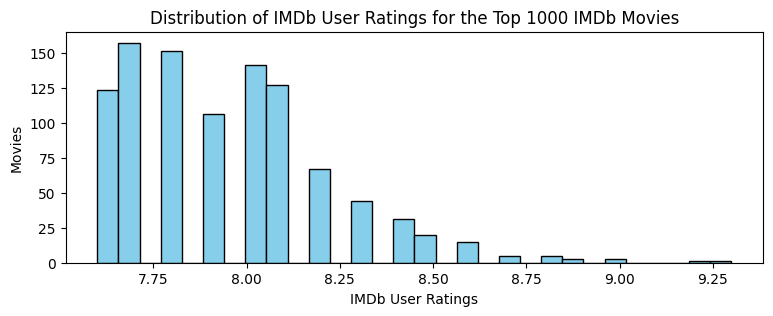

In [35]:
plt.figure(figsize=(9, 3))
plt.hist(ratings_df, bins=30, edgecolor='k', color='skyblue')
plt.title("Distribution of IMDb User Ratings for the Top 1000 IMDb Movies")
plt.xlabel("IMDb User Ratings")
plt.ylabel("Movies")

### Examining the histogram, it is evident that the distribution of movie ratings exhibits a positive skew, which corroborates the numerical analysis. This observation is logical, given that the dataset comprises the top 1000 most popular and highly-rated films on the IMDb website.


### What is the distribution of the gross earnings for movies?

The primary focus to answer this question is the variable:

- `Gross`: amount of money earned or grossed by the movie

Select the `Gross` column as a series.


In [36]:
gross_df = imdb_df["Gross"]
print(gross_df)

0       28341469
1      134966411
2      534858444
3       57300000
4        4360000
         ...    
995     68034751
996     68034751
997     30500000
998     68034751
999     68034751
Name: Gross, Length: 1000, dtype: int32


Similar to the distribution of movie ratings, getting the mean, median, and mode of the gross earnings can help generate insights from the said variable.


In [37]:
gross_df.describe()

count    1.000000e+03
mean     6.803475e+07
std      1.000371e+08
min      1.305000e+03
25%      5.012919e+06
50%      4.238945e+07
75%      6.803475e+07
max      9.366622e+08
Name: Gross, dtype: float64

### The results show that movie gross earnings vary significantly, with a wide range from very low to very high earnings. The average gross earning is approximately $68 million, but the data's standard deviation indicates that there is substantial variability in earnings across the movies. This means that while some movies in the dataset are highly successful and earn a substantial amount, others may not perform as well financially.

To visualize the gross earnings' distribution, a histogram plot will be useful.


Text(0, 0.5, 'Movies')

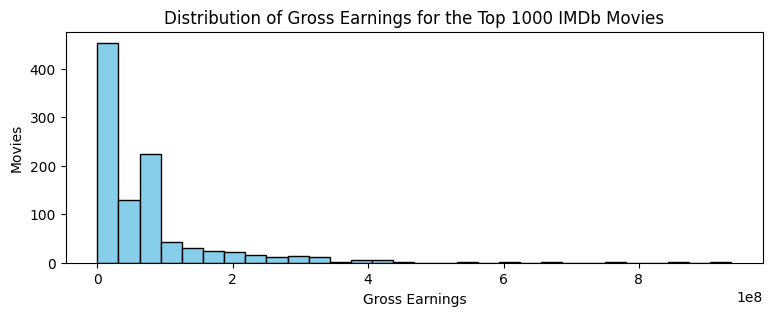

In [38]:
plt.figure(figsize=(9, 3)) 
plt.hist(gross_df, bins=30, edgecolor='k', color='skyblue')
plt.title("Distribution of Gross Earnings for the Top 1000 IMDb Movies")
plt.xlabel("Gross Earnings")
plt.ylabel("Movies")

### The distribution of movie gross earnings in this dataset is positively skewed, with a wide range of earnings, and a few highly successful movies contributing to the positive skew. The substantial variability also aligns with the numerical analysis and is clearly evident in the historgram plot.


### What are the most common movie genres in the dataset?

Remember that in data preprocessing, one-hot encoding was applied to the genre variable.

Thus, the primary focus to answer this question are the variables under:

- `Genre`: type, category, or theme of the movie

which are:

`War`, `Drama`, `Action`, `Adventure`, `Musical`, `Thriller`, `Music`, `History`, `Mystery`, `Crime`, `Comedy`, `Animation`, `Film-Noir`, `Sci-Fi`, `Biography`, `Sport`, `Western`, `Romance`, `Family`, `Fantasy`, `Horror`

To count the movies associated with each genre, we first put the individual genres into an array for easier selection in the DataFrame.


In [39]:
genre_columns = ['War', 'Drama', 'Action', 'Adventure', 'Musical', 'Thriller', 'Music', 'History', 'Mystery', 'Crime', 'Comedy', 'Animation', 'Film-Noir', 'Sci-Fi', 'Biography', 'Sport', 'Western', 'Romance', 'Family', 'Fantasy', 'Horror']

When the datatype is examined, one can see that the columns are in `int64`, rather than `boolean`.

So, to perform the method `sum` to get the total number of movies per genre, we first need to convert it to boolean using the method `astype(bool)`.


In [40]:
imdb_df[genre_columns] = imdb_df[genre_columns].astype(bool)

In [41]:
genre_counts = imdb_df[genre_columns].sum()
print(genre_counts)

War           51
Drama        724
Action       189
Adventure    196
Musical       17
Thriller     137
Music         35
History       56
Mystery       99
Crime        209
Comedy       233
Animation     82
Film-Noir     19
Sci-Fi        67
Biography    109
Sport         19
Western       20
Romance      125
Family        56
Fantasy       66
Horror        32
dtype: int64


After getting the genre_counts, we can get the 10 most common genres overall using the `sort_values` by descending order method and the `head(10)` method


In [42]:
genre_counts = genre_counts.sort_values(ascending=False).head(10)
genre_counts

Drama        724
Comedy       233
Crime        209
Adventure    196
Action       189
Thriller     137
Romance      125
Biography    109
Mystery       99
Animation     82
dtype: int64

Utilizing a bar plot is an effective way to visually represent the genre frequency within the dataset.


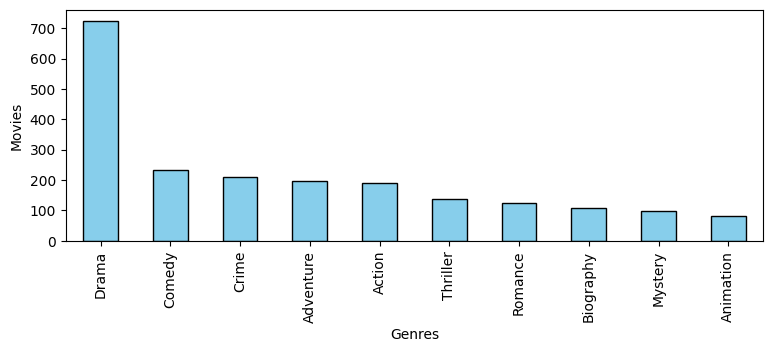

In [43]:
fig, ax = plt.subplots(figsize=(9, 3))
genre_counts[:10].plot(kind='bar', x='Genre', y='Count', ax=ax, edgecolor='k', color='skyblue')
plt.xlabel("Genres")
plt.ylabel("Movies")
plt.show()

### The bar plot analysis underscores the prevalence of the top 10 genres: drama, comedy, crime, adventure, action, thriller, romance, biography, mystery, and animation. Notably, drama stands out as the most frequent genre, constituting a significant 72.4% of the movies in the dataset.


### How has the distribution of movie releases evolved over time?

The primary focus to answer this question is the variable:

- `Released Year`: year in which the movie was publicly released

When looking at the years movies were released, one can examine the frequency of movie releases.

Select the `Released_Year` as a Series.


In [44]:
years_df = imdb_df['Released_Year']

In [45]:
year_counts = years_df.value_counts()
print(year_counts)

Released_Year
2014    32
2004    31
2009    29
2013    28
2016    28
        ..
1930     1
1921     1
1936     1
1922     1
1943     1
Name: count, Length: 99, dtype: int64


One can also determine the most frequent year the top 1000 movies on IMDb was released in.


In [46]:
imdb_df.agg({"Released_Year": ["mode"]})

,Released_Year
,mode
0,2014


### The mode suggests a noteworthy surge in the number of movie releases during the year 2014.

The line chart below will help visualize the distribution of movie releases over time, with years on the x-axis and the number of movies on the y-axis.


In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(year_counts.index, year_counts.values, marker='o', linestyle='-')
plt.title("Distribution of Movie Releases Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Movies Released")

Text(0, 0.5, 'Number of Movies Released')

A histogram will also help in visualizing the data, as shown below.


In [ ]:
plt.figure(figsize=(12, 6))  
plt.hist(years_df, bins=30, edgecolor='k', color='skyblue')
plt.title("Distribution of Movie Releases Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Movies Released")

In [ ]:
imdb_df['Released_Year'].describe()

### The distribution of movie release years in this dataset appears to be relatively narrow and positively skewed, signifying a trend of increasing movie releases over time.


### How does the movie's gross earnings relate to its IMDb rating?

The primary focus to answer this question are the variables:

- `Gross`: year in which the movie was publicly released
- `IMDB_Rating`: year in which the movie was publicly released

Below, you can see the summary statistics for both IMDB_Rating and Gross in the dataset.


In [ ]:
ratings_df.describe()

In [ ]:
gross_df.describe()

In determining their relationship, their correlation to each other must be calculated. This can be done using the method `corr`.


In [ ]:
ratings_df.corr(gross_df)

### The correlation coefficient suggests a weak positive linear relationship between these two variables, implying a slight tendency for movies with higher IMDb ratings to exhibit higher gross earnings.

Knowing this, the scatterplot can be used to further confirm and visualize the interpretation.


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(ratings_df, gross_df, alpha=0.5)
plt.title('IMDb Rating vs. Gross Earnings')
plt.xlabel('IMDb Rating')
plt.ylabel('Gross Earnings')

### Is there any relationship between the movie's release date and the movie's gross earnings?

The primary focus to answer this question are the variables:

- `Gross`: year in which the movie was publicly released
- `Released_Year`: year in which the movie was publicly released

Similar to the earlier question, one can also compute the correlation coefficient between the two variables to determine their relationship.


In [ ]:
years_df.corr(gross_df)

### The correlation coefficient suggests that there is a weak positive relationship between the two variables, suggesting that, to some extent, more recent movies tend to have higher gross earnings.

The scatterplot below will help us visualize more about the relationship between them, as per our interpretation for the coefficient.


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(years_df, gross_df, alpha=0.5)
plt.title('Released Year vs. Gross Earnings')
plt.xlabel('Released Year')
plt.ylabel('Gross Earnings')

### Is there any relationship between the movie's gross earnings and the metascore from critics of movies?

The primary focus to answer this question are the variables:

- `Gross`: year in which the movie was publicly released
- `Meta_score`: year in which the movie was publicly released

Extract the metascore from the IMDb dataframe to make a series for the said variable.


In [ ]:
metascore_df = imdb_df["Meta_score"]
print(metascore_df)

The correlation coefficient between the `Gross` and `Metascore` is calculated to assess the nature and strength of their relationship below.


In [ ]:
metascore_df.corr(gross_df)

### The correlation coefficient suggests that there is a very weak, almost negligible negative relationship, indicating that there is no meaningful linear relationship between a movie's Metascore rating and its gross earnings in the dataset.


The scatterplot below will aid in visualizing this relationship.


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(metascore_df, gross_df, alpha=0.5)
plt.title('Meta Score from Critics vs. Gross Earnings')
plt.xlabel('Meta Score from Critics')
plt.ylabel('Gross Earnings')

### Which genres are most commonly featured in top grossing movies?

In [ ]:
top_gross_movies = imdb_df.nlargest(10, 'Gross')[['Series_Title', 'Gross']]
top_gross_movies_genres = imdb_df.loc[top_gross_movies.index, genre_columns]
top_gross_genre_counts = top_gross_movies_genres.sum()
top_gross_genre_counts


In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
top_gross_genre_counts.plot(kind='bar', x='Genre', y='Count', ax=ax, edgecolor='k', color='skyblue')
plt.title('Genre Counts in Top 10 Grossing Movies')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.show()

### Observing the bar graph, it becomes apparent that the action and adventure genres are prominent among the top-grossing movies.

### Which genres are most commonly featured in top rated movies?

In [ ]:
top_rated_movies = imdb_df.nlargest(10, 'IMDB_Rating')[['Series_Title', 'Gross']]

In [ ]:
top_rated_movies = imdb_df.nlargest(10, 'IMDB_Rating')[['Series_Title', 'Gross']]
top_rated_movies_genres = imdb_df.loc[top_rated_movies.index, genre_columns]
top_rated_genre_counts = top_rated_movies_genres.sum()
top_rated_genre_counts


In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
top_rated_genre_counts.plot(kind='bar', x='Genre', y='Count', ax=ax, edgecolor='k', color='skyblue')
plt.title('Genre Counts in Top 10 Rated Movies')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.show()

###  From the bar graph, it becomes apparent that the drama genre is prevalent among top-rated movies.

### What is the average gross earning per genre?

In [ ]:
genre_gross_means = {}

for x in genre_columns:
    genre_gross_means[x] = imdb_df.groupby(x)['Gross'].mean()[1]

genre_gross_means

In [ ]:
plt.figure(figsize=(12,6)) 
plt.bar(genre_gross_means.keys(), genre_gross_means.values(), edgecolor='k', color='skyblue')
plt.title('Average Gross Earnings by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Gross Earnings')
plt.xticks(rotation=70)
plt.show()

###  Based on the bar graph, it becomes clear that the genres of action, adventure, animation, sci-fi, family, and fantasy yield notably high average gross earnings.

## Research Question

Following our exploratory data analysis, we sought to address the question: "Are there particular combinations of genres that tend to perform exceptionally well financially, and can we identify patterns in these combinations?"

This question emerged as we identified significant variability in the gross earnings of movies in the dataset, with certain genres achieving notably high average gross earnings, many of which are prominently featured among the top-grossing films. Furthermore, our analysis focused on the individual genre's financial performance, prompting the need to explore how these genres interact and form combinations in relation to financial success. By doing so, we aim to provide valuable insights that can guide filmmakers, studios, and producers in making informed decisions when selecting genre combinations for their projects, which, in turn, mitigates uncertainty associated with production costs. Aside from the optimized genre selection, these insights can also shed light on the ever-evolving preferences of audiences and the dynamics of the film industry. 